In [20]:
import pandas as pd

# Load the dataset
prediction_data = pd.read_csv('prediction_data.csv')

# Print the columns of the dataset
print(prediction_data.columns)


Index(['year', 'country', 'life_ladder', 'log_gdp_per_capita',
       'social_suppoprt', 'healthy_life_exp_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'pop_density', 'suicide_rate', 'PC1', 'PC2', 'PC3', 'cluster'],
      dtype='object')


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score

# Load your dataset
data = pd.read_csv('prediction_data.csv')

# Filter data for training and testing, and explicitly create a copy
train_data = data[data['year'] <= 2018].copy()
test_data = data[data['year'] == 2019].copy()

# Define features and target
features = ['life_ladder', 'log_gdp_per_capita', 'social_suppoprt', 'healthy_life_exp_at_birth',
            'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption',
            'positive_affect', 'negative_affect', 'pop_density', 'suicide_rate']
target = 'cluster'

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])

y_train = train_data[target]
y_test = test_data[target]

# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)
test_data['predicted_cluster'] = y_pred

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Compute and print Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.9044117647058824
Cohen's Kappa: 0.8788128041675235
Confusion Matrix:
[[33  1  0  0  0]
 [ 2 19  0  2  0]
 [ 0  0 32  0  1]
 [ 0  2  3 22  0]
 [ 0  0  2  0 17]]


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of trees
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features for the best split
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters Found:")
print(grid_search.best_params_)

# Predict on the test set using the best parameters
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

# Re-calculate test accuracy, confusion matrix and cohen's kappa
test_accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy with Tuned Parameters: {test_accuracy}")
print(f"Cohen's Kappa: {kappa}")
print("Confusion Matrix with Tuned Parameters:")
print(conf_matrix)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\thali\anaconda3\envs\py310_remote_sensing\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters Found:
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 400}
Test Accuracy with Tuned Parameters: 0.9044117647058824
Cohen's Kappa: 0.8788128041675235
Confusion Matrix with Tuned Parameters:
[[33  1  0  0  0]
 [ 2 19  0  2  0]
 [ 0  0 32  0  1]
 [ 0  2  3 22  0]
 [ 0  0  2  0 17]]


Feature Importances:
                         Feature  Importance
1             log_gdp_per_capita    0.221807
3      healthy_life_exp_at_birth    0.134626
0                    life_ladder    0.132634
7                positive_affect    0.091332
10                  suicide_rate    0.086529
2                social_suppoprt    0.071764
4   freedom_to_make_life_choices    0.070558
5                     generosity    0.067450
6      perceptions_of_corruption    0.064897
9                    pop_density    0.032694
8                negative_affect    0.025710


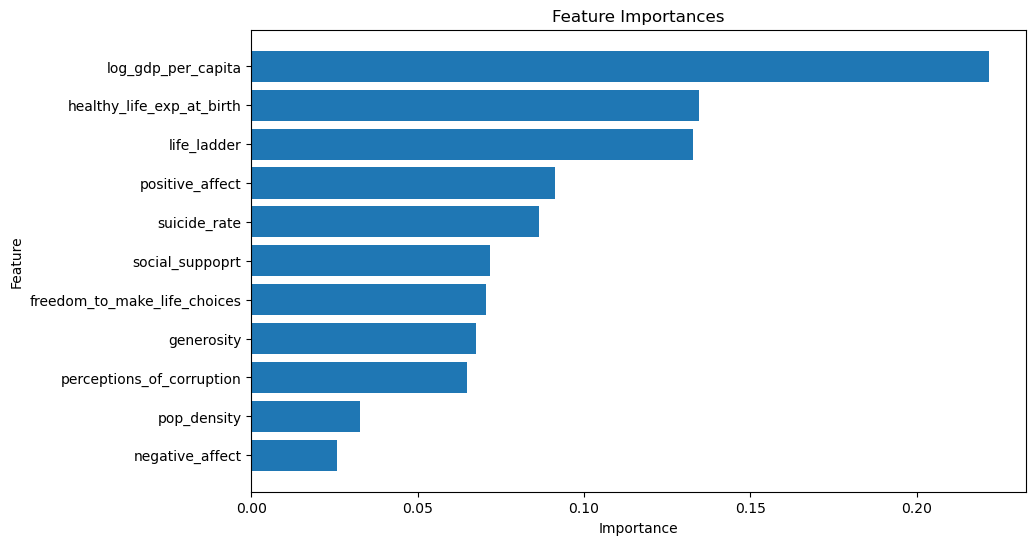

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_classifier' is your trained RandomForestClassifier
# You can also use 'classifier' if you haven't performed hyperparameter tuning

# Get feature importances
importances = best_classifier.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({
    'Feature': features,  # 'features' is the list of feature names
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importances)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Initialize the SVC model
svc = SVC()

# Define the parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4]  # Degree for 'poly' kernel, ignored by others
}

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_svc.fit(X_train, y_train)

# Best parameters found
print("Best Parameters Found for SVC:")
print(grid_search_svc.best_params_)

# Predict on the test set using the best parameters
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

# Evaluate the SVC model with tuned parameters
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_kappa = cohen_kappa_score(y_test, y_pred)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

print(f"SVC Test Accuracy with Tuned Parameters: {svc_accuracy}")
print(f"Cohen's Kappa: {kappa}")
print("SVC Confusion Matrix with Tuned Parameters:")
print(svc_conf_matrix)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters Found for SVC:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVC Test Accuracy with Tuned Parameters: 0.9485294117647058
Cohen's Kappa: 0.8788128041675235
SVC Confusion Matrix with Tuned Parameters:
[[33  1  0  0  0]
 [ 1 22  0  0  0]
 [ 0  0 33  0  0]
 [ 0  1  2 24  0]
 [ 0  0  2  0 17]]


Accuracy of Linear SVC: 0.9117647058823529
Confusion Matrix for Linear SVC:
[[33  0  1  0  0]
 [ 2 17  1  3  0]
 [ 0  0 33  0  0]
 [ 0  2  1 24  0]
 [ 0  0  2  0 17]]

Feature Importances in Linear SVC (Percentage):
                         Feature  Importance (%)
1             log_gdp_per_capita       20.118159
3      healthy_life_exp_at_birth       17.780809
5                     generosity       15.952431
0                    life_ladder       15.252299
2                social_suppoprt       11.020677
10                  suicide_rate        6.100646
6      perceptions_of_corruption        5.630396
7                positive_affect        3.121663
4   freedom_to_make_life_choices        3.116680
9                    pop_density        1.065010
8                negative_affect        0.841230


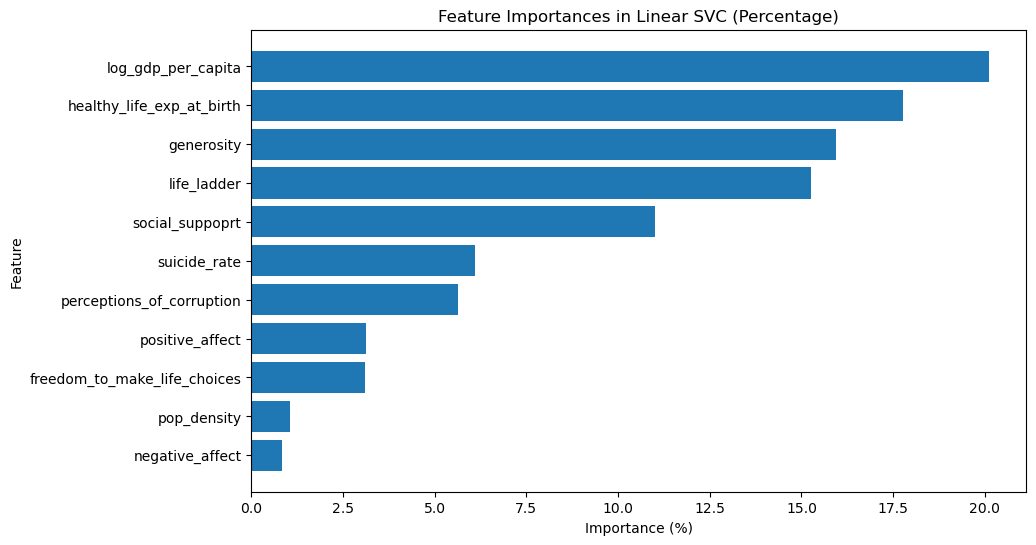

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the SVC model with a linear kernel
svc_linear = SVC(kernel='linear')

# Train the model
svc_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svc_linear.predict(X_test)

# Calculate and print the accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of Linear SVC: {accuracy_linear}")

# Print the confusion matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix for Linear SVC:")
print(conf_matrix_linear)

# Get the model coefficients and use absolute values
coefficients = abs(svc_linear.coef_[0])

# Normalizing the coefficients to sum to 1
coefficients_normalized = coefficients / coefficients.sum()

# Convert to percentage
coefficients_percentage = coefficients_normalized * 100

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance (%)': coefficients_percentage
})

# Sort the DataFrame by the percentage of importance
feature_importances = feature_importances.sort_values(by='Importance (%)', ascending=False)

# Display the feature importances
print("\nFeature Importances in Linear SVC (Percentage):")
print(feature_importances)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance (%)'])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Feature Importances in Linear SVC (Percentage)')
plt.gca().invert_yaxis()
plt.show()

plt.show()


In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the MLP Classifier with two hidden layers, each with 30 neurons
mlp = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLP with 2 Hidden Layers (30 Neurons Each): {accuracy_mlp}")

# Print the confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix for MLP:")
print(conf_matrix_mlp)


Accuracy of MLP with 2 Hidden Layers (30 Neurons Each): 0.9558823529411765
Confusion Matrix for MLP:
[[34  0  0  0  0]
 [ 1 20  0  2  0]
 [ 0  0 33  0  0]
 [ 0  0  1 26  0]
 [ 0  0  2  0 17]]
